# SETUP 

### Log in to PPI

`$ ssh -A xvis-m4a.met.no`

### Clone or update this repository

`$ git clone https://github.com/jgliss/pyaerocom-meetings.git`

#### Or (if you have it cloned already)

`$ cd pyaerocom-meetings`  
`$ git pull`


### Activate conda environment that has pyaerocom and dependencies installed

`$ module load aerocom/aerocom-pyaerocom-master`

### Start jupyter

After activating the pyaerocom environment, open jupyter lab using the following command:

`$ jupyter lab --no-browser --ip=$HOSTNAME.met.no`

# More info about pyaerocom

- Website and code documentation (API): https://pyaerocom.met.no/
- GitHub: https://github.com/metno/pyaerocom

# Session 2: Working with gridded data in pyaerocom (models and satellite data)

The main purpose of the AeroCom project is to compare model output data with observations. Last week, we showed how to read and work with ***ungridded observation data*** using the classes ***UngriddedData***  and ***StationData*** and using the example of the AERONET database (which comes in form of CSV files, one per station). 

As you know, both the model and the observation datasets are stored on PPI and the data directory of each dataset can be accessed via an *unique ID* for the dataset and as you learned last week, you can use the `browse_database` method to find data on PPI.

Today, we will introduce how to read model data and satellite data from the AeroCom database and how you can work with the data.

### **Note:** Let us know if you find any issues or have suggestions for improvements

[Create an issue](https://github.com/metno/pyaerocom/issues)

## Part 1: Reading of and working with gridded data (using ECMWF CAMS reanalysis as example)

In [1]:
from warnings import filterwarnings
filterwarnings('ignore') # suppress warnings
import pyaerocom as pya

Initating pyaerocom configuration
Checking server configuration ...
Checking access to: /lustre/storeA
Access to lustre database: True
Init data paths for lustre
Expired time: 0.015 s


Check version of pyaerocom:

In [2]:
pya.__version__ #0.8.0.dev14

'0.8.0.dev14'

### Search data ID for ECMWF CAMS reanalysis data

In [3]:
pya.browse_database('*ecmwf*rean*')


Pyaerocom ReadGridded
---------------------
Model ID: ECMWF_CAMS_REAN
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/ECMWF_CAMS_REAN/renamed
Available variables: ['ang4487aer', 'ec532aer3D', 'od440aer', 'od550aer', 'od550bc', 'od550dust', 'od550oa', 'od550so4', 'od550ss', 'od865aer', 'sconcpm10', 'sconcpm25']
Available years: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 9999]
Available time resolutions ['daily', 'monthly']

Pyaerocom ReadGridded
---------------------
Model ID: ECMWF_CAMS_REAN_T255
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/ECMWF_CAMS_REAN_T255/renamed
Available variables: ['bscatc532aerboa', 'bscatc532aertoa', 'ec532aer', 'time', 'z']
Available years: [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
Available time resolutions ['daily']

Pyaerocom ReadGridded
---------------------
Model ID: ECMWF_MACC_REAN
Data directory: /lustre/storeA/pr

You can see that there are three matches that can be read. The attribute `dataset_name` specifies the ID that we are looking for that is required to read the data.

Below, we are interested in the following dataset: 

In [4]:
DATA_ID = 'ECMWF_CAMS_REAN'

#### Pick one (or more) variable(s) of interest

From the output above, you can also see which variables the individual datasets provide. The variable names follow
AeroCom conventions and you can find more information (e.g. CF standard names) about each variable [here](https://pyaerocom.met.no/config_files.html#variables).

In the following we will import the aerosol optical depth data at 550 nm (`od550aer`)

In [5]:
VAR_TO_READ = 'od550aer' # you can also use a list of supported variables if you like, e.g. (od550aer, od440aer)

#### Side comment on data format:

Other than the ungridded observational datasets, all *gridded data* in the AeroCom database is available in the form of NetCDF files and follow common naming conventions, that can be used to identify usefule meta information directly from the filenames.

Each NetCDF file contains only 1 variable and one year of data in a certain time resolution. 

### Read AOD fields for year 2010

Create an instance of the reading class for **gridded data**, the `ReadGridded` class, which is part of the `io` subpackage (note: last week, we used the `ReadUngridded` class):

In [6]:
reader = pya.io.ReadGridded(DATA_ID)
print(reader)


Pyaerocom ReadGridded
---------------------
Model ID: ECMWF_CAMS_REAN
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/ECMWF_CAMS_REAN/renamed
Available variables: ['ang4487aer', 'ec532aer3D', 'od440aer', 'od550aer', 'od550bc', 'od550dust', 'od550oa', 'od550so4', 'od550ss', 'od865aer', 'sconcpm10', 'sconcpm25']
Available years: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 9999]
Available time resolutions ['daily', 'monthly']


#### Read the dataset 

Reading of individual variables can be done with the `read` method (as illustrated below). The `read` method can take a single variable (string) or multiple variables (list of strings) as input and thus, always returns a `tuple` of `pyaerocom.GriddedData` objects, even if only one variable was requested. 

You may specify further reading constraints, like start, stop, or time resolution (ts_type).

In [7]:
help(reader.read)

Help on method read in module pyaerocom.io.readgridded:

read(var_names=None, start=None, stop=None, ts_type=None, flex_ts_type=True, require_all_vars_avail=False) method of pyaerocom.io.readgridded.ReadGridded instance
    Read all variables that could be found 
    
    Reads all variables that are available (i.e. in :attr:`vars`)
    
    Parameters
    ----------
    var_names : :obj:`list` or :obj:`str`
        variables that are supposed to be read
    start : :obj:`Timestamp` or :obj:`str`, optional
        start time of data import (if valid input, then the current 
        :attr:`start` will be overwritten)
    stop : :obj:`Timestamp` or :obj:`str`, optional
        stop time of data import (if valid input, then the current 
        :attr:`start` will be overwritten)
    ts_type : str
        string specifying temporal resolution (choose from 
        "hourly", "3hourly", "daily", "monthly"). If None, prioritised 
        of the available resolutions is used
    flex_ts_type :

In [8]:
list_of_data_objects = reader.read(var_names='od550aer', start=2008, stop=2012, ts_type='daily')
# Since read() returns a tuple, get the first element 
data = list_of_data_objects[0]

In [9]:
print(data)

pyaerocom.GriddedData: ECMWF_CAMS_REAN
Grid data: Aerosol optical depth at 550 nm / (1) (time: 1462; latitude: 161; longitude: 320)
     Dimension coordinates:
          time                             x               -               -
          latitude                         -               x               -
          longitude                        -               -               x
     Attributes:
          Conventions: CF-1.6
          NCO: "4.5.4"
          history: Thu May 24 10:39:37 2018: ncecat -O -u time -n 366,3,1 CAMS_REAN_001.nc...
          nco_openmp_thread_number: 1
     Cell methods:
          mean: step
          mean: time


The data object is an instance of the [pyaerocom.GriddedData](https://pyaerocom.met.no/api.html?highlight=ungriddeddata#pyaerocom.griddeddata.GriddedData) class and is a *single variable object (i.e. it is designed to hold data from only one variable)*. 

The `GriddedData` object is based on the [iris.Cube](https://scitools.org.uk/iris/docs/v1.9.0/html/iris/iris/cube.html#iris.cube.Cube) class and provides an interface that can be used to work with the data and further analyse it. 

**If needed:** The actual instance of the `iris.Cube` class can be accessed via the `grid` attribute:

In [10]:
type(data.grid)

iris.cube.Cube

Supplemental information from import:

In [11]:
data.suppl_info

OrderedDict([('from_files',
              ['/lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/ECMWF_CAMS_REAN/renamed/ECMWF_CAMS_REAN.daily.od550aer.2008.nc',
               '/lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/ECMWF_CAMS_REAN/renamed/ECMWF_CAMS_REAN.daily.od550aer.2009.nc',
               '/lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/ECMWF_CAMS_REAN/renamed/ECMWF_CAMS_REAN.daily.od550aer.2010.nc',
               '/lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/ECMWF_CAMS_REAN/renamed/ECMWF_CAMS_REAN.daily.od550aer.2011.nc',
               '/lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/ECMWF_CAMS_REAN/renamed/ECMWF_CAMS_REAN.daily.od550aer.2012.nc']),
             ('data_id', 'ECMWF_CAMS_REAN'),
             ('ts_type', 'daily'),
             ('regridded', False),
             ('computed', False),
             ('region', None),
             ('reader',
              <pyaerocom.io.readgridded.ReadGridded at 0x7fe1

#### Dimensions

All dimension names follow CF conventions.

In [12]:
data.dimcoord_names

['time', 'latitude', 'longitude']

In [13]:
data.longitude

DimCoord(array([-180.   , -178.875, -177.75 , -176.625, -175.5  , -174.375,
       -173.25 , -172.125, -171.   , -169.875, -168.75 , -167.625,
       -166.5  , -165.375, -164.25 , -163.125, -162.   , -160.875,
       -159.75 , -158.625, -157.5  , -156.375, -155.25 , -154.125,
       -153.   , -151.875, -150.75 , -149.625, -148.5  , -147.375,
       -146.25 , -145.125, -144.   , -142.875, -141.75 , -140.625,
       -139.5  , -138.375, -137.25 , -136.125, -135.   , -133.875,
       -132.75 , -131.625, -130.5  , -129.375, -128.25 , -127.125,
       -126.   , -124.875, -123.75 , -122.625, -121.5  , -120.375,
       -119.25 , -118.125, -117.   , -115.875, -114.75 , -113.625,
       -112.5  , -111.375, -110.25 , -109.125, -108.   , -106.875,
       -105.75 , -104.625, -103.5  , -102.375, -101.25 , -100.125,
        -99.   ,  -97.875,  -96.75 ,  -95.625,  -94.5  ,  -93.375,
        -92.25 ,  -91.125,  -90.   ,  -88.875,  -87.75 ,  -86.625,
        -85.5  ,  -84.375,  -83.25 ,  -82.125,  -81. 

In [14]:
data.latitude

DimCoord(array([ 90.   ,  88.875,  87.75 ,  86.625,  85.5  ,  84.375,  83.25 ,
        82.125,  81.   ,  79.875,  78.75 ,  77.625,  76.5  ,  75.375,
        74.25 ,  73.125,  72.   ,  70.875,  69.75 ,  68.625,  67.5  ,
        66.375,  65.25 ,  64.125,  63.   ,  61.875,  60.75 ,  59.625,
        58.5  ,  57.375,  56.25 ,  55.125,  54.   ,  52.875,  51.75 ,
        50.625,  49.5  ,  48.375,  47.25 ,  46.125,  45.   ,  43.875,
        42.75 ,  41.625,  40.5  ,  39.375,  38.25 ,  37.125,  36.   ,
        34.875,  33.75 ,  32.625,  31.5  ,  30.375,  29.25 ,  28.125,
        27.   ,  25.875,  24.75 ,  23.625,  22.5  ,  21.375,  20.25 ,
        19.125,  18.   ,  16.875,  15.75 ,  14.625,  13.5  ,  12.375,
        11.25 ,  10.125,   9.   ,   7.875,   6.75 ,   5.625,   4.5  ,
         3.375,   2.25 ,   1.125,   0.   ,  -1.125,  -2.25 ,  -3.375,
        -4.5  ,  -5.625,  -6.75 ,  -7.875,  -9.   , -10.125, -11.25 ,
       -12.375, -13.5  , -14.625, -15.75 , -16.875, -18.   , -19.125,
       -20.

In [15]:
data.time

DimCoord(array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.459e+03, 1.460e+03,
       1.461e+03]), standard_name='time', units=Unit('days since 2008-01-01 00:00:00', calendar='gregorian'))

Timestamps are stored as time since epoch, but may also be converted into `numpy.datetime64` objects:

In [16]:
timestamps = data.time_stamps()
timestamps

array(['2008-01-01T00:00:00.000000', '2008-01-02T00:00:00.000000',
       '2008-01-03T00:00:00.000000', ..., '2011-12-30T00:00:00.000000',
       '2011-12-31T00:00:00.000000', '2012-01-01T00:00:00.000000'],
      dtype='datetime64[us]')

Basic arithmetics (applied to whole 3D array):

In [17]:
data.min(), data.max(), data.mean()

(0.00047506253533358134, 8.205355586132884, 0.11927665314185198)

Compute area weighted mean (for each timestamp):

In [18]:
areamean = data.area_weighted_mean()
areamean

/home/jonasg/anaconda3/lib/python3.6/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


masked_array(data=[0.11946831739595465, 0.11981778842851223,
                   0.12024927223102076, ..., 0.1243984427689658,
                   0.127551882220741, 0.12617301278514984],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20)

Little sidetour: plot timeseries of area weighted mean.

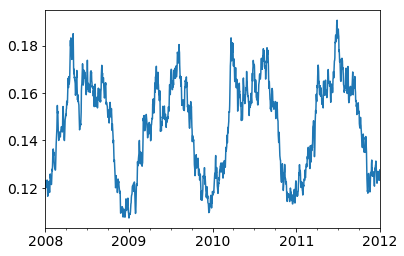

In [19]:
import pandas as pd
# we will use this below again to compare with noresm
area_mean_rean = pd.Series(areamean, index=timestamps)
area_mean_rean.plot()

Quickplot of maps (you can specify the time index or a string):

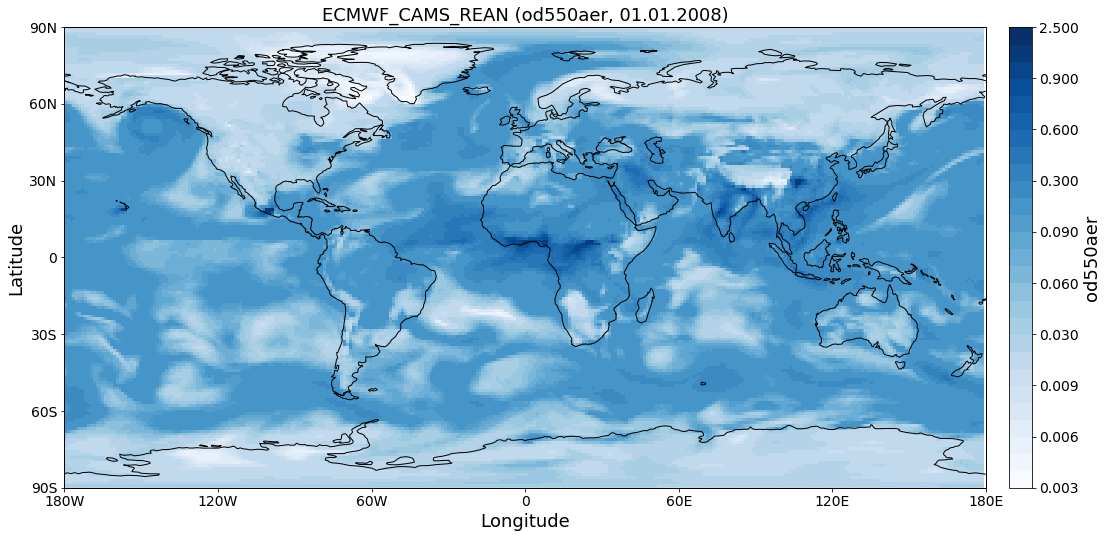

In [20]:
data.quickplot_map(time_idx=0);

If you specify a time string, it will automatically search for the closest match:

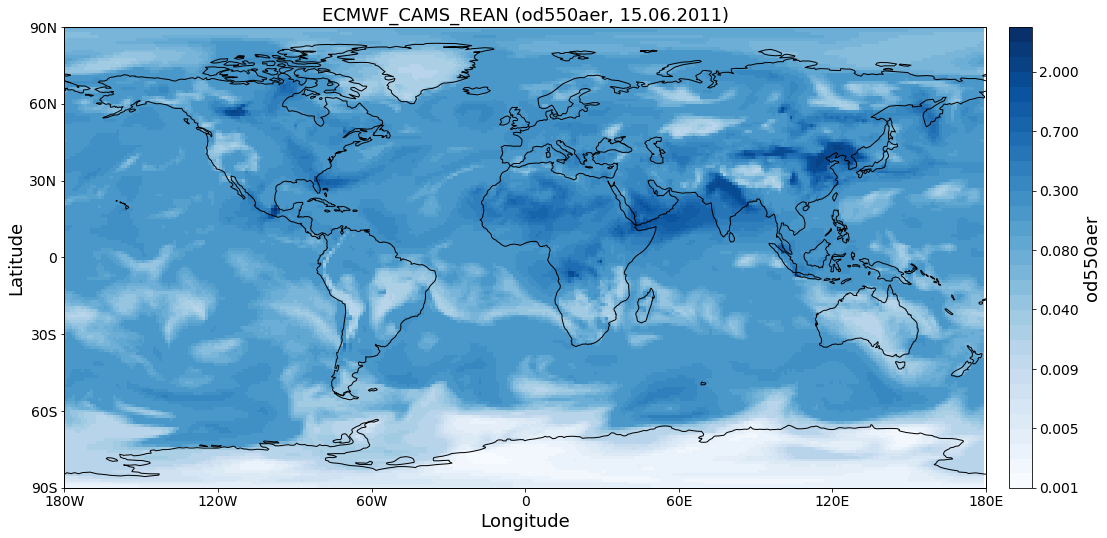

In [21]:
data.quickplot_map('15-6-2011');

#### Extract a time series at certain locations, e.g. Oslo

Time series exrtaction uses neirest neighbour to input coordinates and returns a list of `StationData` objects for each of the input coordinates (could also be a list of station coordinates from an observation network, cf. tutorial last week).

In [22]:
lats = [59.9139, 30]
lons = [10.7522, 10]

In [23]:
list_of_stationdata_objects = data.to_time_series(latitude=lats, longitude=lons)

Interpolating data of shape (1462, 161, 320). This may take a while.
Successfully interpolated cube


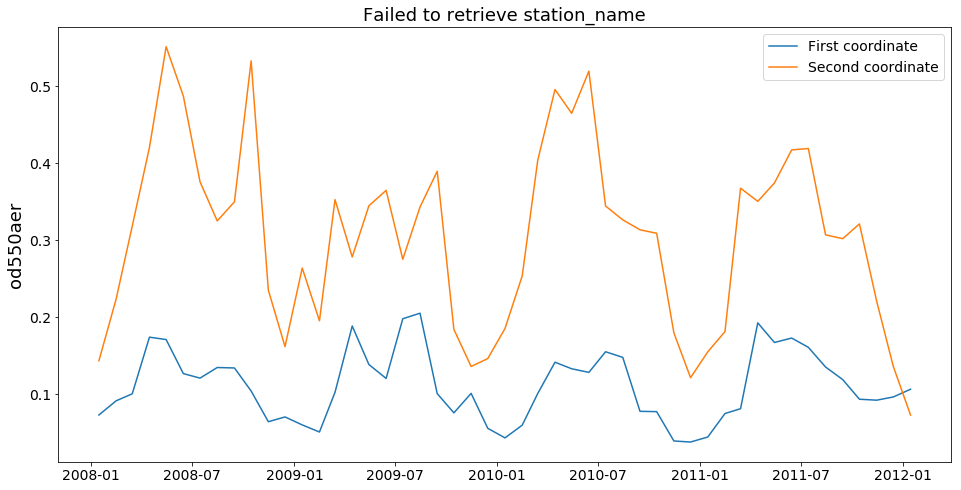

In [24]:
stat0, stat1 = list_of_stationdata_objects
ax = stat0.plot_timeseries('od550aer', freq='monthly', label='First coordinate')
stat1.plot_timeseries('od550aer', freq='monthly', label='Second coordinate', ax=ax)

### Extract a subset

You have several options here:

#### Using `isel` method

**NOTE:** the `isel` method was developed very recently.

In [25]:
subset1 = data.sel(latitude=(30, 70), longitude=(5, 20))
subset1

pyaerocom.GriddedData
Grid data: <iris 'Cube' of Aerosol optical depth at 550 nm / (1) (time: 1462; latitude: 36; longitude: 15)>

Plot first:

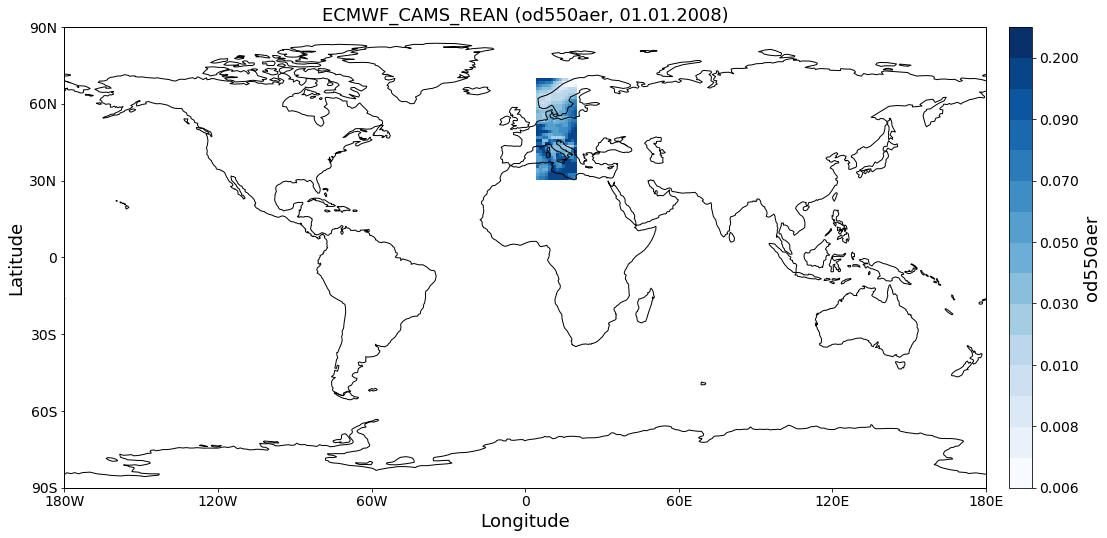

In [26]:
subset1.quickplot_map(0);

#### Using `crop` method:


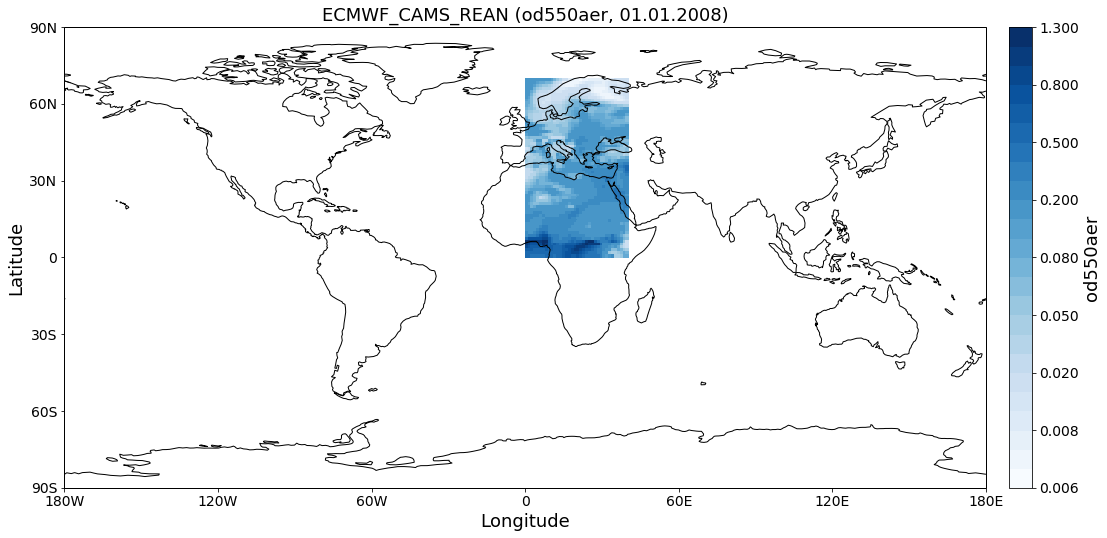

In [27]:
subset2 = data.crop(lat_range=(0,70), lon_range=(0, 40))
subset2.quickplot_map(0);

#### Using predefined AeroCom filter

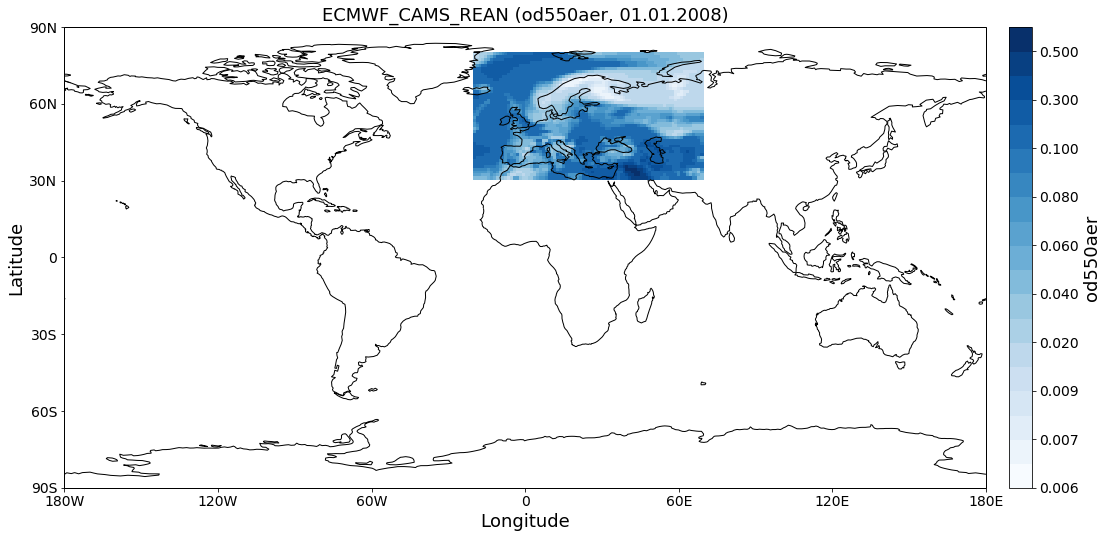

In [28]:
fil = pya.Filter('EUROPE')

subset3 = fil(data)
subset3.quickplot_map(0);

### Resampling of time

In [29]:
monthly = data.downscale_time('monthly')
monthly

pyaerocom.GriddedData
Grid data: <iris 'Cube' of Aerosol optical depth at 550 nm / (1) (time: 49; latitude: 161; longitude: 320)>

### Regridding

#### Use your own grid

In [30]:
import numpy as np
lons = np.arange(-180, 181, 15)
lats = np.arange(-90, 91, 10)

Interpolating data of shape (1462, 161, 320). This may take a while.
Successfully interpolated cube


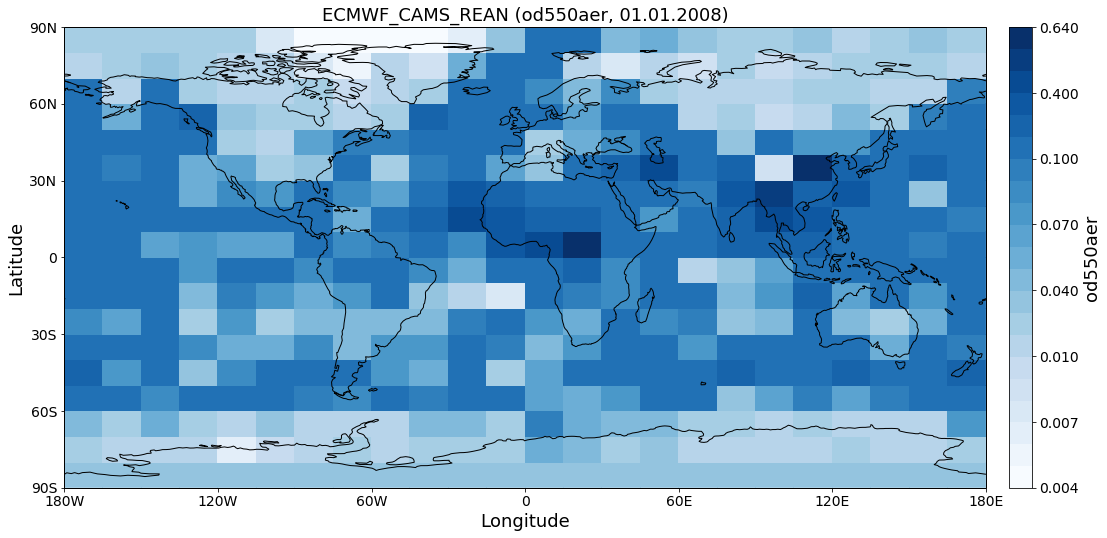

In [31]:
data_coarse = data.interpolate(latitude=lats, longitude=lons)
data_coarse.quickplot_map(0);

#### Use `regrid` method:

Other than the `interpolation` method, the `regrid` method takes another instance of the `GriddedData` class (e.g. a satellite dataset). For simplicity, we use the low-res object that we just created:

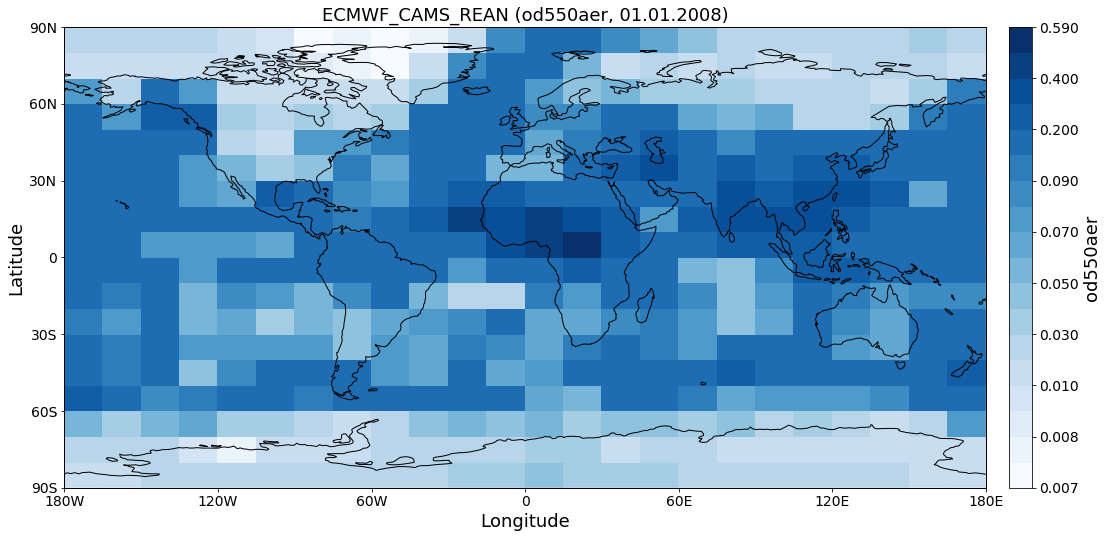

In [32]:
data_coarse2 = data.regrid(data_coarse)
data_coarse2.quickplot_map(0);

If you compare the last two plots, you see that they are similar but not exactly the same. The reason for that is, because the `regrid` method is more advanced and uses the [area weighted regridding feature provided by the iris library](https://scitools.org.uk/iris/docs/v2.0/userguide/interpolation_and_regridding.html#area-weighted-regridding).

### Reading a NetCDF file directly into `GriddedData`

The `ReadGridded` class relies on the aerocom file naming conventions, i.e. the relevant meta information to process a query (e.g. start and stop time, temporal resolution) is extracted directly from the file names and all matches are then concatenated into one `iris.Cube` instance containing the variable data. 

If you want to read single NetCDF files directly, you can do provide the file path directly to the `GriddedData` class. Note, that this requires to specify the variable that you want to read, in case the NetCDF file contains more than one variable.

In [33]:
example_dir = '/lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III/CAM5.3-Oslo_AP3-CTRL2016-PD/renamed/'
example_file = 'aerocom3_CAM5.3-Oslo_AP3-CTRL2016-PD_od550csaer_Column_2010_monthly.nc'

od550aer_noresm = pya.GriddedData(example_dir+example_file, var_name='od550csaer')
od550aer_noresm

pyaerocom.GriddedData
Grid data: <iris 'Cube' of Clear air Aerosol optical depth at 550nm / (1) (time: 12; latitude: 192; longitude: 288)>

#### Compare area weighted mean with ECMWF CAMS reanalysis

/home/jonasg/anaconda3/lib/python3.6/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


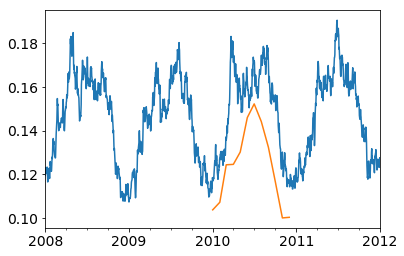

In [34]:
area_mean_noresm = pd.Series(od550aer_noresm.area_weighted_mean(), index=od550aer_noresm.time_stamps())

ax = area_mean_rean.plot()
area_mean_noresm.plot(ax=ax)

In [35]:
merged = pd.concat(dict(ecmwf=area_mean_rean, noresm=area_mean_noresm), axis=1)
merged.head()

,ecmwf,noresm
2008-01-01,0.119468,NaN
2008-01-02,0.119818,NaN
2008-01-03,0.120249,NaN
2008-01-04,0.123023,NaN
2008-01-05,0.123097,NaN


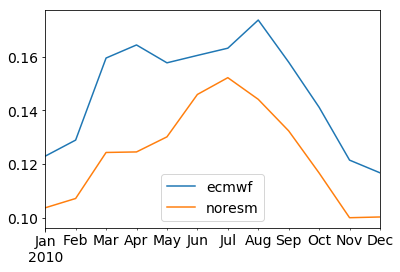

In [36]:
merged = merged.resample('M').mean().dropna()
merged.plot()

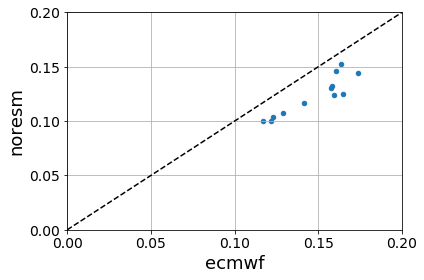

In [37]:
ax = merged.plot.scatter('ecmwf', 'noresm', xlim=(0, .2), ylim=(0,.2))
ax.plot([0,.2], [0,.2], '--', c='k')
ax.grid()

## Part 2: Your turn

Now you have seen a good amount of what the `GriddedData` class can do. Please use the examples above and continue on your own. Here are some suggestions how you can find your way into the *gridded data world of pyaerocom*:

- Find ID another gridded dataset (e.g. MODIS6 satellite data, terra or aqua; CAM5.3-Oslo data) that contains AOD fields at 550 nm.
- Read the data using the `ReadGridded` class (you may also read some other parameters)
- Play with it (i.e. copy some of the steps above, draw maps, extract timeseries, extract subsets, etc..)
- Compare with ECMWF data from Part 1, e.g. 
    - by resampling on same time resolution and comparing timeseries of area-weighted mean, or
    - by regridding either of the two objects onto the grid of the other, or ...
- EXTRA: if you have time, import ungridded data from last week (Aeronet version 3 AODs) and colocate the `GriddedData` objects from this session with the `UngriddedData` object from the last session (e.g. for the year 2010). Methods for colocation can be found in [pyaerocom.colocation](https://pyaerocom.met.no/api.html#colocation-of-data) module.
